In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/ChatpGPT Prompts.csv')

In [3]:
df.head()

,act,prompt
0,Linux Terminal,I want you to act as a linux terminal. I will ...
1,English Translator and Improver,"I want you to act as an English translator, sp..."
2,`position` Interviewer,I want you to act as an interviewer. I will be...
3,JavaScript Console,I want you to act as a javascript console. I w...
4,Excel Sheet,I want you to act as a text based excel. you'l...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   act     153 non-null    object
 1   prompt  153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [5]:
for i in df.columns:
    print(df[i].value_counts())

act
Life Coach            2
Linux Terminal        1
Legal Advisor         1
Ascii Artist          1
Python interpreter    1
                     ..
Tea-Taster            1
Interior Decorator    1
Florist               1
Self-Help Book        1
Muslim imam           1
Name: count, Length: 152, dtype: int64
prompt
I want you to act as a linux terminal. I will type commands and you will reply with what the terminal should show. I want you to only reply with the terminal output inside one unique code block, and nothing else. do not write explanations. do not type commands unless I instruct you to do so. when i need to tell you something in english, i will do so by putting text inside curly brackets {like this}. my first command is pwd                                                                                1
I want you to act as my legal advisor. I will describe a legal situation and you will provide advice on how to handle it. You should only reply with your advice, and nothing else

## Data Vaisualization

In [6]:
# First, find the word that's frequency of occurrece
from collections import Counter
all_text = ' '.join(df['act'])
all_text = all_text.split(' ')
word_count = Counter(all_text)
word_count.most_common(5)

[('Generator', 11), ('Coach', 7), ('Teacher', 4), ('AI', 4), ('Developer', 4)]

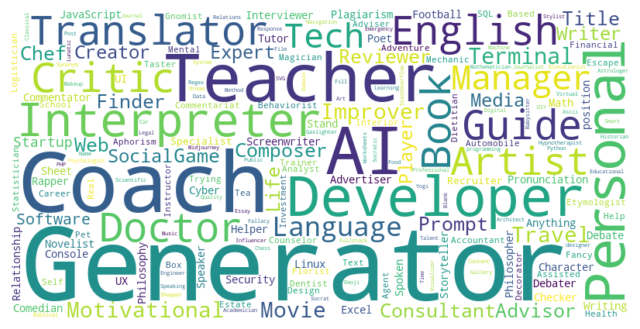

In [7]:
# then we use worldcloud to visualize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800,height = 400, background_color='white').generate(' '.join(df['act']))
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='group', ylabel='lenght_of_promot'>

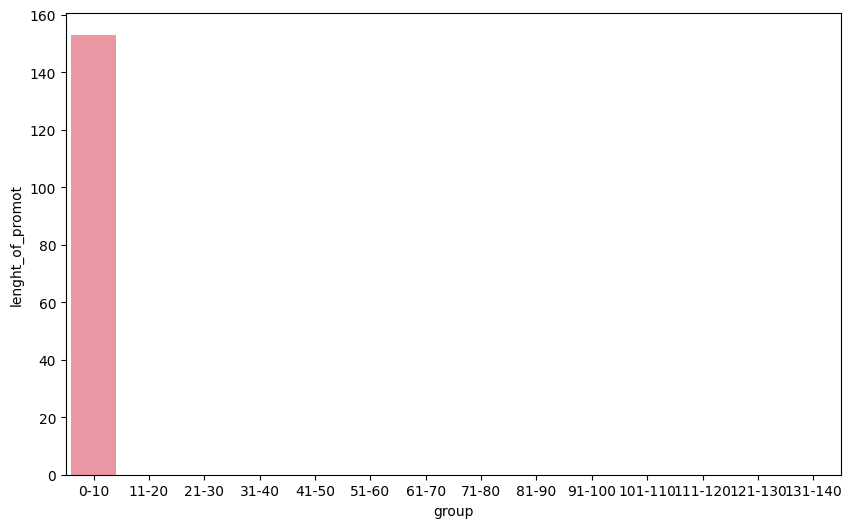

In [8]:
# Second, we want to see the length of prompt

import seaborn as sns
df['lenght_of_promot'] = df['act'].apply(lambda x: len(x.split(' ')))
bins = range(0,141,10)
labeles = ['0-10', '11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100',
         '101-110','111-120','121-130','131-140']
#df['group'] = pd.cut(df['lenght_of_promot'],bins=bins,right=False,labels=lables)
df['group'] = pd.cut(df['lenght_of_promot'], bins=bins, right=False, labels=labeles)
grounped = df.groupby('group')['lenght_of_promot'].count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='group',y='lenght_of_promot',data=grounped)

In [9]:
# then we want to know the two highest frequency words in dataframe looks like
df[df['act'].str.contains('Generator') | df['act'].str.contains('Coach')]

,act,prompt,lenght_of_promot,group
14,Motivational Coach,I want you to act as a motivational coach. I w...,2,0-10
17,Debate Coach,I want you to act as a debate coach. I will pr...,2,0-10
21,Relationship Coach,I want you to act as a relationship coach. I w...,2,0-10
32,Life Coach,I want you to act as a life coach. I will prov...,2,0-10
60,Fancy Title Generator,I want you to act as a fancy title generator. ...,3,0-10
62,Prompt Generator,I want you to act as a prompt generator. First...,2,0-10
67,Smart Domain Name Generator,I want you to act as a smart domain name gener...,4,0-10
94,Public Speaking Coach,I want you to act as a public speaking coach. ...,3,0-10
112,Midjourney Prompt Generator,I want you to act as a prompt generator for Mi...,3,0-10
115,Regex Generator,I want you to act as a regex generator. Your r...,2,0-10


We have completed the data analysis, now we can proceed to further analyze the text within prompt.
we use five different way to complete
keyword extraction. --> the most frequency words
LDA --> to find the theme in prompt
Sentiment --> Is there any sentiment in prompt?
N-gram --> the most frequency occurring phrases or expressions

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vect = CountVectorizer(stop_words='english')

In [12]:
x = vect.fit_transform(df['prompt'])

In [13]:
word_freq = Counter()

In [14]:
for word, index in vect.vocabulary_.items():
    word_freq[word] = x[:,index].sum()
commod_words = word_freq.most_common(20)
print(commod_words)

[('want', 187), ('act', 143), ('request', 90), ('provide', 79), ('need', 77), ('write', 70), ('help', 62), ('reply', 53), ('explanations', 42), ('like', 41), ('use', 32), ('suggestion', 32), ('create', 30), ('order', 26), ('type', 25), ('code', 25), ('english', 25), ('come', 24), ('make', 23), ('language', 22)]


Text(0.5, 0, 'Frequncy')

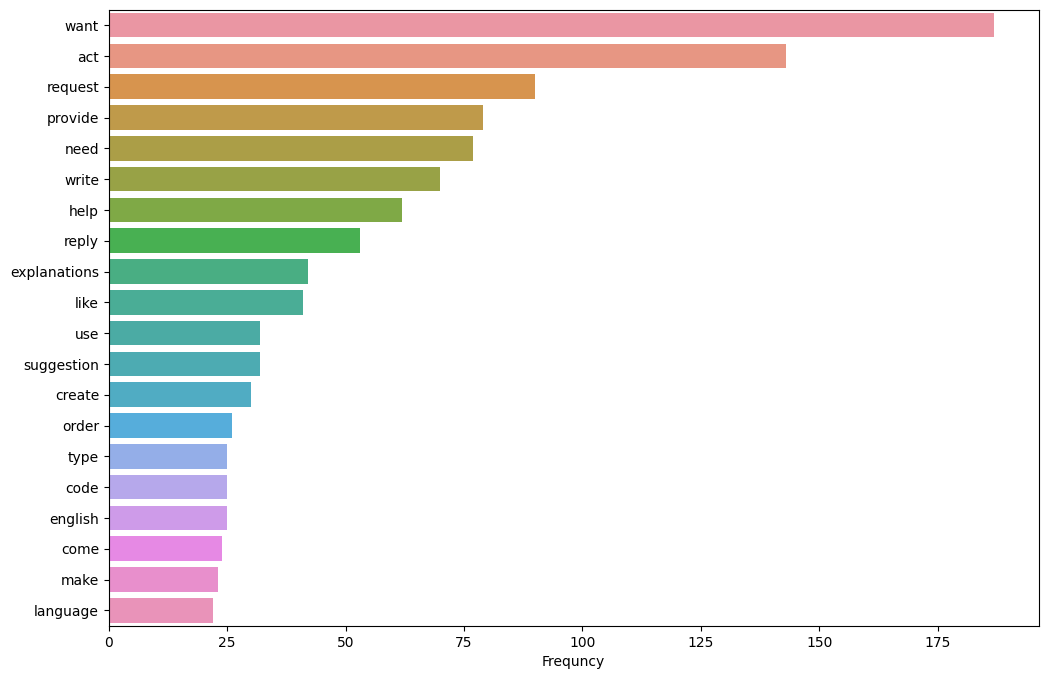

In [15]:
#plot this result
words, frequency = zip(*commod_words)
plt.figure(figsize=(12,8))
sns.barplot(x=list(frequency),y=list(words))
plt.xlabel('Frequncy')

In [16]:
# Let's try LDA to analyze the prompt

from sklearn.decomposition import LatentDirichletAllocation
n_tapics = 3
lda_model = LatentDirichletAllocation(n_components=n_tapics,random_state=0)
lda_model.fit(x)

LatentDirichletAllocation(n_components=3, random_state=0)

In [17]:
word_in_topic = {}

In [18]:
feature_names = vect.get_feature_names_out()

In [19]:
for topic_idx, topic in enumerate(lda_model.components_):
        topic_word = [feature_names[i] for i in topic.argsort()[-11:-1]]
        word_in_topic[f"Topic{topic_idx+1}"] = topic_word
word_in_topic

{'Topic1': ['type',
  'code',
  'sentence',
  'text',
  'english',
  'explanations',
  'like',
  'reply',
  'act',
  'write'],
 'Topic2': ['information',
  'explanations',
  'write',
  'suggestion',
  'help',
  'need',
  'dan',
  'provide',
  'request',
  'want'],
 'Topic3': ['order',
  'use',
  'come',
  'suggestion',
  'create',
  'help',
  'provide',
  'need',
  'request',
  'act']}

1. for topic 1, we can think that this topic is related to some kind of explanation of code.
2. for topic 2, they need some help and ask for more information.
3. for topic 3, it's a little bit similar with topic 3, but more on creating something.

In [20]:
# Let's try sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
def sentiment_score(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Nagative'
    else:
        return 'Neutral'
df['nltk_score'] = df['prompt'].apply(sentiment_score)

In [23]:
# Let's see the result of first prompt
print(df['prompt'].loc[0])
print('-----------')
print(df['nltk_score'].loc[0])

I want you to act as a linux terminal. I will type commands and you will reply with what the terminal should show. I want you to only reply with the terminal output inside one unique code block, and nothing else. do not write explanations. do not type commands unless I instruct you to do so. when i need to tell you something in english, i will do so by putting text inside curly brackets {like this}. my first command is pwd
-----------
Nagative


nltk_score
Positive    138
Nagative     14
Neutral       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Sentiment Score Distribution')

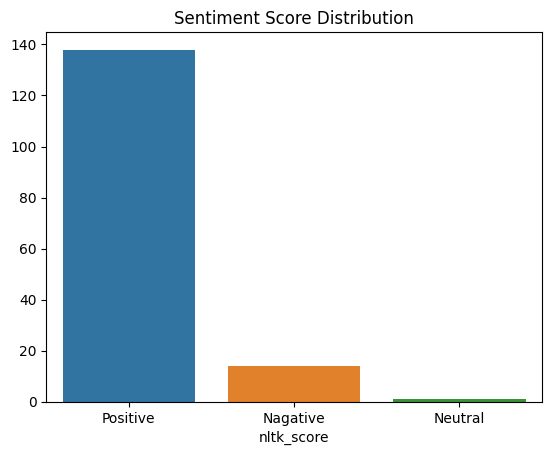

In [24]:
# do some visualization
nltk_score_dist = df['nltk_score'].value_counts()
print(nltk_score_dist)
sns.barplot(x=nltk_score_dist.index,y=nltk_score_dist.values)
plt.title('Sentiment Score Distribution')

In [25]:
# Also we can see the easy way like textblob
from textblob import TextBlob

In [26]:
def analze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.03:
        return 'Positive'
    elif analysis.sentiment.polarity > 0:
        return 'Negative'
    else:
        return 'Neutral'

In [27]:
df['texblob_score'] = df['prompt'].apply(analze_sentiment)
sentiment_distribution = df['texblob_score'].value_counts()
print(sentiment_distribution)

texblob_score
Positive    138
Neutral      10
Negative      5
Name: count, dtype: int64


Text(0.5, 1.0, 'Sentiment Distribution in Prompts')

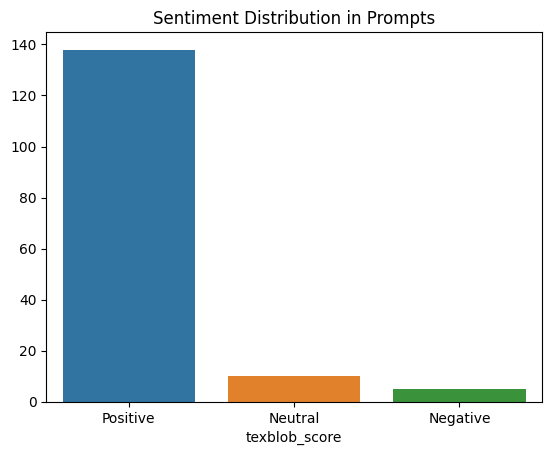

In [28]:
# Plotting the sentiment distribution
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Sentiment Distribution in Prompts')

In [29]:
len(df[df['nltk_score'] != df['texblob_score']])/len(df)

0.16993464052287582

Looks like the result from two ways is similary

In [30]:
# Final, we do n-gram to find the word sequence
ngram_vec = CountVectorizer(ngram_range=(2,3), stop_words='english')

In [31]:
ngram_metric = ngram_vec.fit_transform(df['prompt'])

In [32]:
df_ngram = pd.DataFrame(ngram_metric.toarray(),columns=ngram_vec.get_feature_names_out()).sum()

In [33]:
top_ngram = df_ngram.sort_values(ascending = False).head(20)

Text(0.5, 1.0, 'Top 20 Most Frequent N-grams in Prompts')

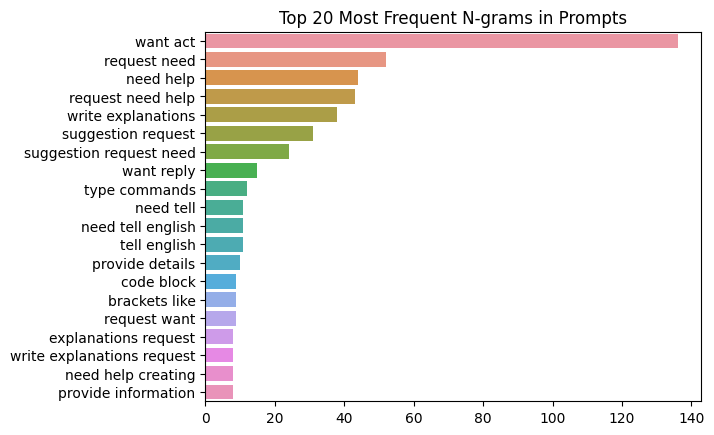

In [34]:
sns.barplot(y=top_ngram.index, x=top_ngram.values)
plt.title('Top 20 Most Frequent N-grams in Prompts')